# Define the AM-FM sinusoid signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [1]:
# load packages
using Plots
using FFTW
import LinearAlgebra:norm

## Define the amplitude modulated (AM) sinusoid signal.

In [2]:
"""
AMFMSinSig(dataT, snr, b, f0, f1) generates a AM-FMsinusoid S. 
dataT is the vector of time stamps at which the samples 
of the signal are to be computed. snr is the matched filtering 
signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that 
parametrize the phase of the signal.
"""
function AMFMSinSig(dataT, snr::Real, b::Real, f0::Real, f1::Real)
    phaseVec01 = 2π*f1*dataT
    phaseVec02 = 2π*f0*dataT + b*cos.(2π*f1*dataT)
    sigVec = cos.(phaseVec01) .* sin.(phaseVec02)
    sigVec = snr*sigVec/norm(sigVec)
end

# test the function
AMFMSinSig(1, 1, 1, 1, 1), AMFMSinSig([1,2], 1, 1, 1, 1)

(1.0, [0.707107, 0.707107])

In [3]:
?AMFMSinSig

search: AMFMSinSig



AMFMSinSig(dataT, snr, b, f0, f1) generates a AM-FMsinusoid S.  dataT is the vector of time stamps at which the samples  of the signal are to be computed. snr is the matched filtering  signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that  parametrize the phase of the signal.


## Plot the signal.

In [4]:
#Set signal parameters.
snr = 10;
b = 1;
f0 = 20;
f1 = 20;

In [5]:
#Instantaneous frequency after 1 sec.
maxFreq = max(2π*f1, 2π*f0 + b*cos(2π*f1));
samplFreq = 5*maxFreq;
samplIntrvl = 1/samplFreq;

In [6]:
#Time samples.
times = collect(0:samplIntrvl:1.0);

# Number of samples
nSamples = length(times);

# Generate the signal.
signals = AMFMSinSig(times, snr, b, f0, f1);

### Plot the signal.

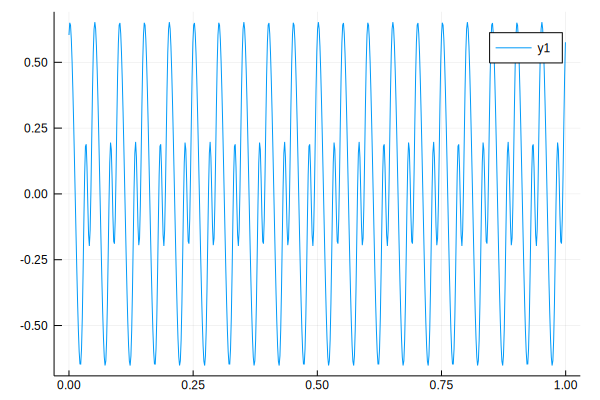

In [7]:
plot(times,signals)

### Plot the periodogram.

In [8]:
# Length of data 
dataLen = times[end]-times[1]

# DFT sample corresponding to Nyquist frequency
kNyq = Int(floor(nSamples/2)+1)

# Positive Fourier frequencies
posFreq = (0:(kNyq-1))*(1/dataLen);

# FFT of signal
fftSig = fft(signals);

# Discard negative frequencies
fftSig = fftSig[1:kNyq];

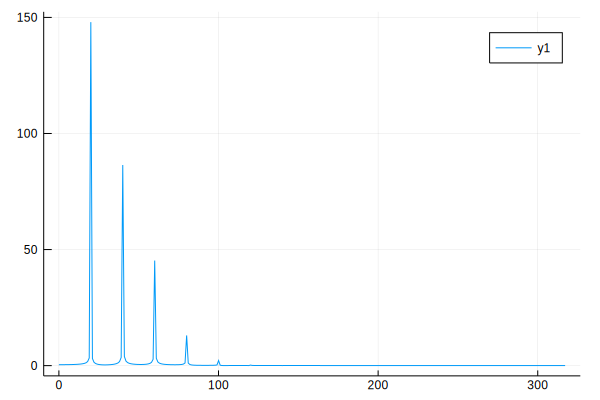

In [9]:
# Plot periodogram
plot(posFreq,abs.(fftSig))